# Exercise 6
***Andrés Mauricio Obando Acevedo***

## SVM & Regularization


For this homework we consider a set of observations on a number of red and white wine varieties involving their chemical properties and ranking by tasters. Wine industry shows a recent growth spurt as social drinking is on the rise. The price of wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Pricing of wine depends on such a volatile factor to some extent. Another key factor in wine certification and quality assessment is physicochemical tests which are laboratory-based and takes into account factors like acidity, pH level, presence of sugar and other chemical properties. For the wine market, it would be of interest if human quality of tasting can be related to the chemical properties of wine so that certification and quality assessment and assurance process is more controlled.

Two datasets are available of which one dataset is on red wine and have 1599 different varieties and the other is on white wine and have 4898 varieties. All wines are produced in a particular area of Portugal. Data are collected on 12 different properties of the wines one of which is Quality, based on sensory data, and the rest are on chemical properties of the wines including density, acidity, alcohol content etc. All chemical properties of wines are continuous variables. Quality is an ordinal variable with possible ranking from 1 (worst) to 10 (best). Each variety of wine is tasted by three independent tasters and the final rank assigned is the median rank given by the tasters.

A predictive model developed on this data is expected to provide guidance to vineyards regarding quality and price expected on their produce without heavy reliance on volatility of wine tasters.

In [26]:
import pandas as pd
import numpy as np

In [27]:
data_r = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_red.csv')
data_w = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_white.csv')

In [101]:
data = data_w.assign(type = 'white')

data = data.append(data_r.assign(type = 'red'), ignore_index=True)
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
213,6.7,0.13,0.29,5.3,0.051,31.0,122.0,0.99440,3.44,0.37,9.7,6,white
2424,6.2,0.44,0.18,7.7,0.096,28.0,210.0,0.99771,3.56,0.72,9.2,5,white
1503,6.8,0.36,0.24,4.6,0.039,24.0,124.0,0.99090,3.27,0.34,12.6,7,white
4968,7.7,0.63,0.08,1.9,0.076,15.0,27.0,0.99670,3.32,0.54,9.5,6,red
3521,5.9,0.23,0.24,3.8,0.038,61.0,152.0,0.99139,3.31,0.50,11.3,7,white


# Exercise 6.1

Show the frecuency table of the quality by type of wine

Se busca clasificar cuales son buenos y malos en binario

In [29]:
data[['quality','type']].groupby('quality').count()

,type
quality,
3,30
4,216
5,2138
6,2836
7,1079
8,193
9,5


# SVM

# Exercise 6.2

* Standarized the features (not the quality)
* Create a binary target for each type of wine
* Create two Linear SVM's for the white and red wines, repectively.


before aply a stadarized model, is important to know the distribution of data, let's see:

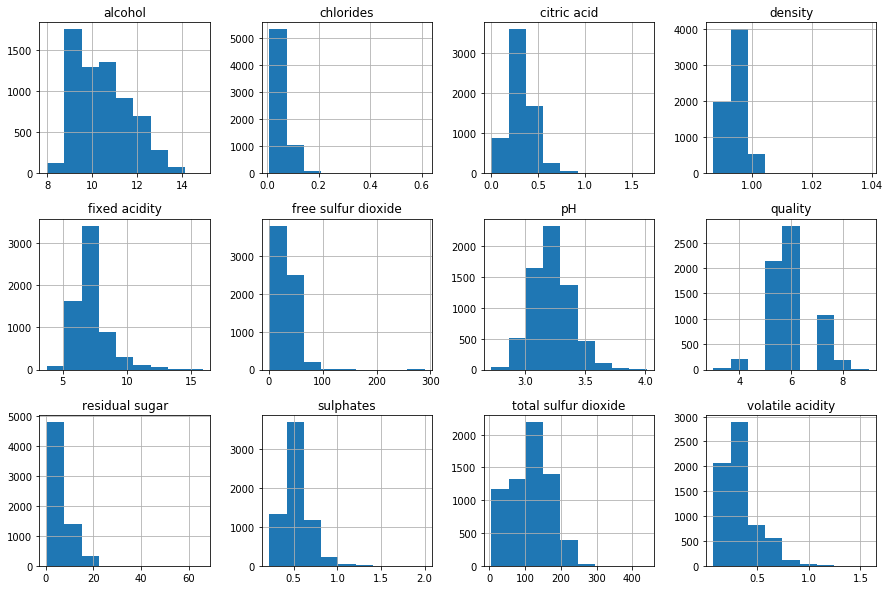

In [76]:
hist = data.hist(bins=9, layout=(3,4),figsize=(15,10))

We can observe on histograms, that the data are in differente range each one, some are in decimals, others in units or hundreds; but, there are not values with frecuencies anormaly, so it's possible and necesary stadarize the features with the scope of give all the same weight with independency of their magnitude.

**Standarize**

In [81]:
from sklearn.preprocessing import Normalizer
X = data.drop(['quality','type'],axis=1)
transformer = Normalizer().fit(X)
X_normalized=transformer.transform(X)

In [93]:
X_norm = pd.DataFrame(columns=X.columns, data=X_normalized)
X_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.039447,0.001522,0.002029,0.116649,0.000254,0.253585,0.957988,0.005641,0.016906,0.002536,0.049590
1,0.047267,0.002251,0.002551,0.012004,0.000368,0.105038,0.990361,0.007458,0.024759,0.003676,0.071276
2,0.078912,0.002728,0.003897,0.067221,0.000487,0.292266,0.944992,0.009694,0.031760,0.004287,0.098396
3,0.037412,0.001195,0.001663,0.044166,0.000301,0.244214,0.966464,0.005173,0.016575,0.002078,0.051441
4,0.037412,0.001195,0.001663,0.044166,0.000301,0.244214,0.966464,0.005173,0.016575,0.002078,0.051441


In [103]:
data2=pd.concat([X_norm,data[['quality','type']]], axis=1,join='inner')
data2.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1948,0.051214,0.001351,0.002205,0.009958,0.000327,0.263184,0.960266,0.007070,0.023758,0.004054,0.072553,7,white
1211,0.038298,0.001417,0.002046,0.035150,0.000336,0.146896,0.986304,0.005224,0.017260,0.001574,0.050889,5,white
2415,0.075019,0.002196,0.002745,0.021042,0.000457,0.210418,0.969755,0.009093,0.027263,0.004574,0.091486,5,white
926,0.063585,0.007006,0.001178,0.032970,0.000495,0.306152,0.942006,0.011695,0.039564,0.004475,0.109508,5,white
3993,0.057448,0.002401,0.002915,0.076311,0.000412,0.274376,0.951742,0.008528,0.027866,0.004630,0.094317,7,white


**Binary Target**

In [104]:
data2['quality2'] = data2['quality'] > 6

In [105]:
data_white=data2[data2['type']=='white']
data_red=data2[data2['type']=='red']
data_white.shape,data_red.shape

((4898, 14), (1599, 14))

**Linear SVM**

In [136]:
from sklearn.svm import SVC # "Support Vector Classifier"
y_w = data_white['quality2']
X_w = data_white.drop(['quality','type'],axis=1)

y_r = data_red['quality2']
X_r = data_red.drop(['quality','type'],axis=1)

**_White wine_**

In [137]:
clf_WW = SVC(kernel='linear')
clf_WW.fit(X_w, y_w)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [138]:
y_w_pred = clf_WW.predict(X_w)

**_Red wine_**

In [139]:
clf_rw = SVC(kernel='linear')
clf_rw.fit(X_r, y_r)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [140]:
y_r_pred = clf_WW.predict(X_r)

# Exercise 6.3

Test the two SVM's using the different kernels (‘poly’, ‘rbf’, ‘sigmoid’)


In [141]:
from sklearn.metrics import accuracy_score

Accuracy for linear SVM

In [142]:
w_acc_lin=accuracy_score(y_w, y_w_pred, normalize=True)
r_acc_lin=accuracy_score(y_r, y_r_pred, normalize=True)
w_acc_lin,r_acc_lin

(1.0, 1.0)

Now, let' try with differents kernels and compare the accuracy of each.

_White wine:_

In [157]:
kernels=['linear','poly', 'rbf', 'sigmoid']
accuracyname=['A_w_poly', 'A_w_rbf', 'A_w_sigmoid']
Acc_val = []
for k in range(len(kernels)):
    clf_WW_r = SVC(kernel=kernels[k])
    clf_WW_r.fit(X_w, y_w)
    y_w_pred_r = clf_WW_r.predict(X_w)
    Acc_val.append(accuracy_score(y_w, y_w_pred_r, normalize=True))
    print('WW_Acc_'+kernels[k]+':',Acc_val[k])

WW_Acc_linear: 1.0
WW_Acc_poly: 1.0
WW_Acc_rbf: 1.0
WW_Acc_sigmoid: 1.0


In [144]:
from sklearn.metrics import f1_score

In [158]:
Acc_val = []
for k in range(len(kernels)):
    clf_WW_r = SVC(kernel=kernels[k])
    clf_WW_r.fit(X_w, y_w)
    y_w_pred_r = clf_WW_r.predict(X_w)
    Acc_val.append(f1_score(y_w, y_w_pred_r, average='binary'))
    print('WW_f1_'+kernels[k]+':',Acc_val[k])

WW_f1_linear: 1.0
WW_f1_poly: 1.0
WW_f1_rbf: 1.0
WW_f1_sigmoid: 1.0


_Red wine:_

In [159]:
Acc_val = []
for k in range(len(kernels)):
    clf_RW_r = SVC(kernel=kernels[k])
    clf_RW_r.fit(X_w, y_w)
    y_r_pred_r = clf_RW_r.predict(X_r)
    Acc_val.append(accuracy_score(y_r, y_r_pred_r, normalize=True))
    print('RW_Acc_'+kernels[k]+':',Acc_val[k])

RW_Acc_linear: 1.0
RW_Acc_poly: 1.0
RW_Acc_rbf: 1.0
RW_Acc_sigmoid: 1.0


# Exercise 6.4
Using the best SVM find the parameters that gives the best performance

'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001]

Se evalua con la clasificación: el accuracy

# Exercise 6.5

Compare the results with other methods

Se compara con LOGIT

# Regularization

# Exercise 6.6


* Train a linear regression to predict wine quality (Continous) (Lo mismo del 6.5)

* Analyze the coefficients

* Evaluate the RMSE

# Exercise 6.7

* Estimate a ridge regression with alpha equals 0.1 and 1.
* Compare the coefficients with the linear regression
* Evaluate the RMSE

# Exercise 6.8

* Estimate a lasso regression with alpha equals 0.01, 0.1 and 1.
* Compare the coefficients with the linear regression
* Evaluate the RMSE

# Exercise 6.9

* Create a binary target

* Train a logistic regression to predict wine quality (binary)

* Analyze the coefficients

* Evaluate the f1score

# Exercise 6.10

* Estimate a regularized logistic regression using:
* C = 0.01, 0.1 & 1.0
* penalty = ['l1, 'l2']
* Compare the coefficients and the f1score

Usando regularización